In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
img = cv2.imread('./PCB_DATASET/images/Missing_hole/01_missing_hole_01.jpg')

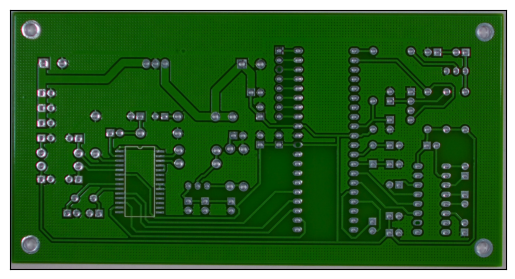

In [4]:
plt.imshow(img)
plt.xticks([]); plt.yticks([])
plt.show()

In [8]:
img = cv2.imread('./PCB_DATASET/images/Missing_hole/01_missing_hole_01.jpg', cv2.IMREAD_GRAYSCALE)

img.shape

(1586, 3034)

In [10]:
img[:,0]

array([141, 140, 141, ..., 136, 141, 142], dtype=uint8)

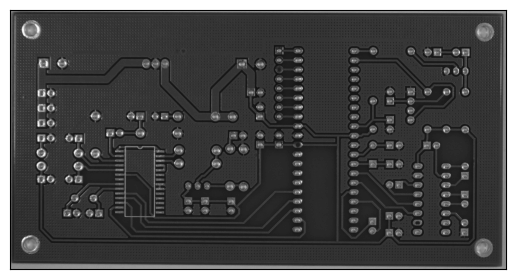

In [14]:
plt.imshow(img, 'gray')
plt.xticks([]); plt.yticks([])
plt.show()

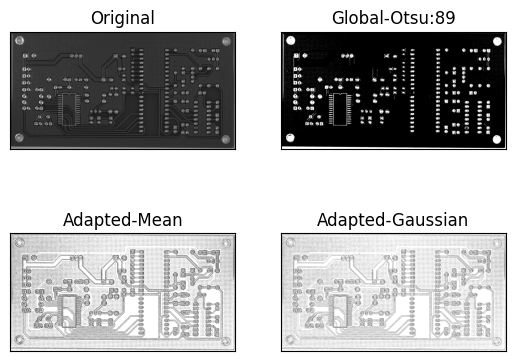

In [13]:
blk_size = 9        # 블럭 사이즈
C = 5               # 차감 상수 
ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# ---② 어뎁티드 쓰레시홀드를 평균과 가우시안 분포로 각각 적용
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
                                      cv2.THRESH_BINARY, blk_size, C)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                     cv2.THRESH_BINARY, blk_size, C)

# ---③ 결과를 Matplot으로 출력
imgs = {'Original': img, 'Global-Otsu:%d'%ret:th1, \
        'Adapted-Mean':th2, 'Adapted-Gaussian': th3}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v,'gray')
    plt.xticks([]),plt.yticks([])

plt.show()

In [31]:
img = cv2.imread('./PCB_DATASET/images/Missing_hole/01_missing_hole_01.jpg')
img = cv2.resize(img, (img.shape[0]//5, img.shape[1]//10))


# 가우시안 커널을 직접 생성해서 블러링  ---①
k1 = np.array([[1, 2, 1],
                   [2, 4, 2],
                   [1, 2, 1]]) *(1/16)
blur1 = cv2.filter2D(img, -1, k1)

# 가우시안 커널을 API로 얻어서 블러링 ---②
k2 = cv2.getGaussianKernel(3, 0)
blur2 = cv2.filter2D(img, -1, k2*k2.T)

# 가우시안 블러 API로 블러링 ---③
blur3 = cv2.GaussianBlur(img, (3, 3), 0)

# 결과 출력
print('k1:', k1)
print('k2:', k2*k2.T)
merged = np.hstack((img, blur1, blur2, blur3))
cv2.imshow('gaussian blur', merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

k1: [[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]
k2: [[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


In [24]:
img = cv2.imread('./PCB_DATASET/images/Missing_hole/01_missing_hole_01.jpg')
img.shape[0]

1586

In [ ]:
# absdiff 절대값 차 연산

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

In [6]:
#--① 연산에 필요한 영상을 읽고 그레이스케일로 변환
img1 = cv2.imread('./PCB_DATASET/images/Missing_hole/01_missing_hole_01.jpg')
img2 = cv2.imread('./PCB_DATASET/images/Missing_hole/01_missing_hole_02.jpg')

img1 = cv2.resize(img1, (800, 600))
img2 = cv2.resize(img2, (800, 600))

img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#--② 두 영상의 절대값 차 연산
diff = cv2.absdiff(img1_gray, img2_gray)

#--③ 차 영상을 극대화 하기 위해 쓰레시홀드 처리 및 컬러로 변환
_, diff = cv2.threshold(diff, 1, 255, cv2.THRESH_BINARY)
diff_red = cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)
diff_red[:,:,2] = 0

#--④ 두 번째 이미지에 변화 부분 표시
spot = cv2.bitwise_xor(img2, diff_red)

#--⑤ 결과 영상 출력
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('diff', diff)
cv2.imshow('spot', spot)
cv2.waitKey()
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

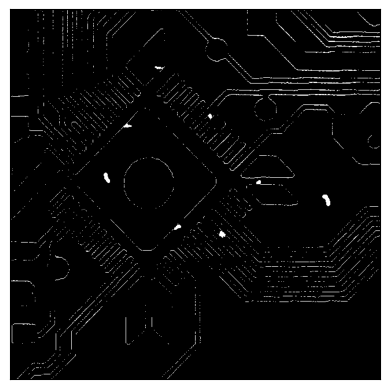

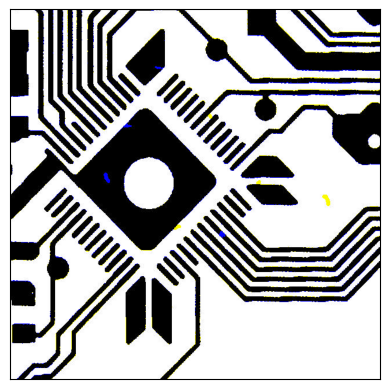

In [4]:
#--① 연산에 필요한 영상을 읽고 그레이스케일로 변환
img1 = cv2.imread('./PCBData/group00041/00041/00041048_temp.jpg')
img2 = cv2.imread('./PCBData/group00041/00041/00041048_test.jpg')

img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#--② 두 영상의 절대값 차 연산
diff = cv2.absdiff(img1_gray, img2_gray)

#--③ 차 영상을 극대화 하기 위해 쓰레시홀드 처리 및 컬러로 변환
_, diff = cv2.threshold(diff, 200, 255, cv2.THRESH_BINARY)
diff_red = cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)
diff_red[:,:,2] = 0

#--④ 두 번째 이미지에 변화 부분 표시
spot = cv2.bitwise_xor(img2, diff_red)

# ---③ 결과를 Matplot으로 출력
imgs = {'img1': img1, 'img2' : img2, \
        'diff': diff, 'spot': spot}

# plt.title('diff')
plt.imshow(diff,'gray')
plt.xticks([]),plt.yticks([])
plt.show()

# plt.title('spot')
plt.imshow(spot,'gray')
plt.xticks([]),plt.yticks([])
plt.show()

# #--⑤ 결과 영상 출력
# cv2.imshow('img1', img1)
# cv2.imshow('img2', img2)
# cv2.imshow('diff', diff)
# cv2.imshow('spot', spot)
# cv2.waitKey()
# cv2.destroyAllWindows()

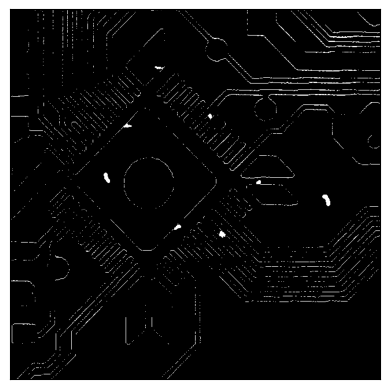

In [6]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

img1 = cv2.imread('./PCBData/group00041/00041/00041048_temp.jpg')
img2 = cv2.imread('./PCBData/group00041/00041/00041048_test.jpg')

img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

diff = cv2.absdiff(img1_gray, img2_gray)

_, diff = cv2.threshold(diff, 200, 255, cv2.THRESH_BINARY)

plt.imshow(diff,'gray')
plt.xticks([]),plt.yticks([])
plt.show()